### Student Information
Name: 朱冠瑜

Student ID: 113062642

GitHub ID: KUANYUshy8

Kaggle name: Henry shy8

Kaggle private scoreboard snapshot: 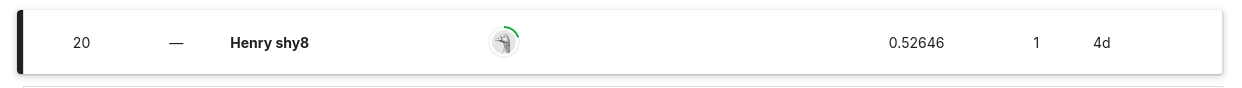

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

# Part1

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


term_frequencies = [2 1 1 ... 2 2 1]
indices = [8930 9119  537 ... 5658 5659 5057]
filtered_terms = ['the' 'to' 'and' ... 'merenthaprophet' 'mericanmainer' 'lauralittlelegs']
filtered_frequencies = [1736 1289  955 ...    1    1    1]


/tmp/ipykernel_418431/23212421.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(filtered_terms[:30], rotation=90)


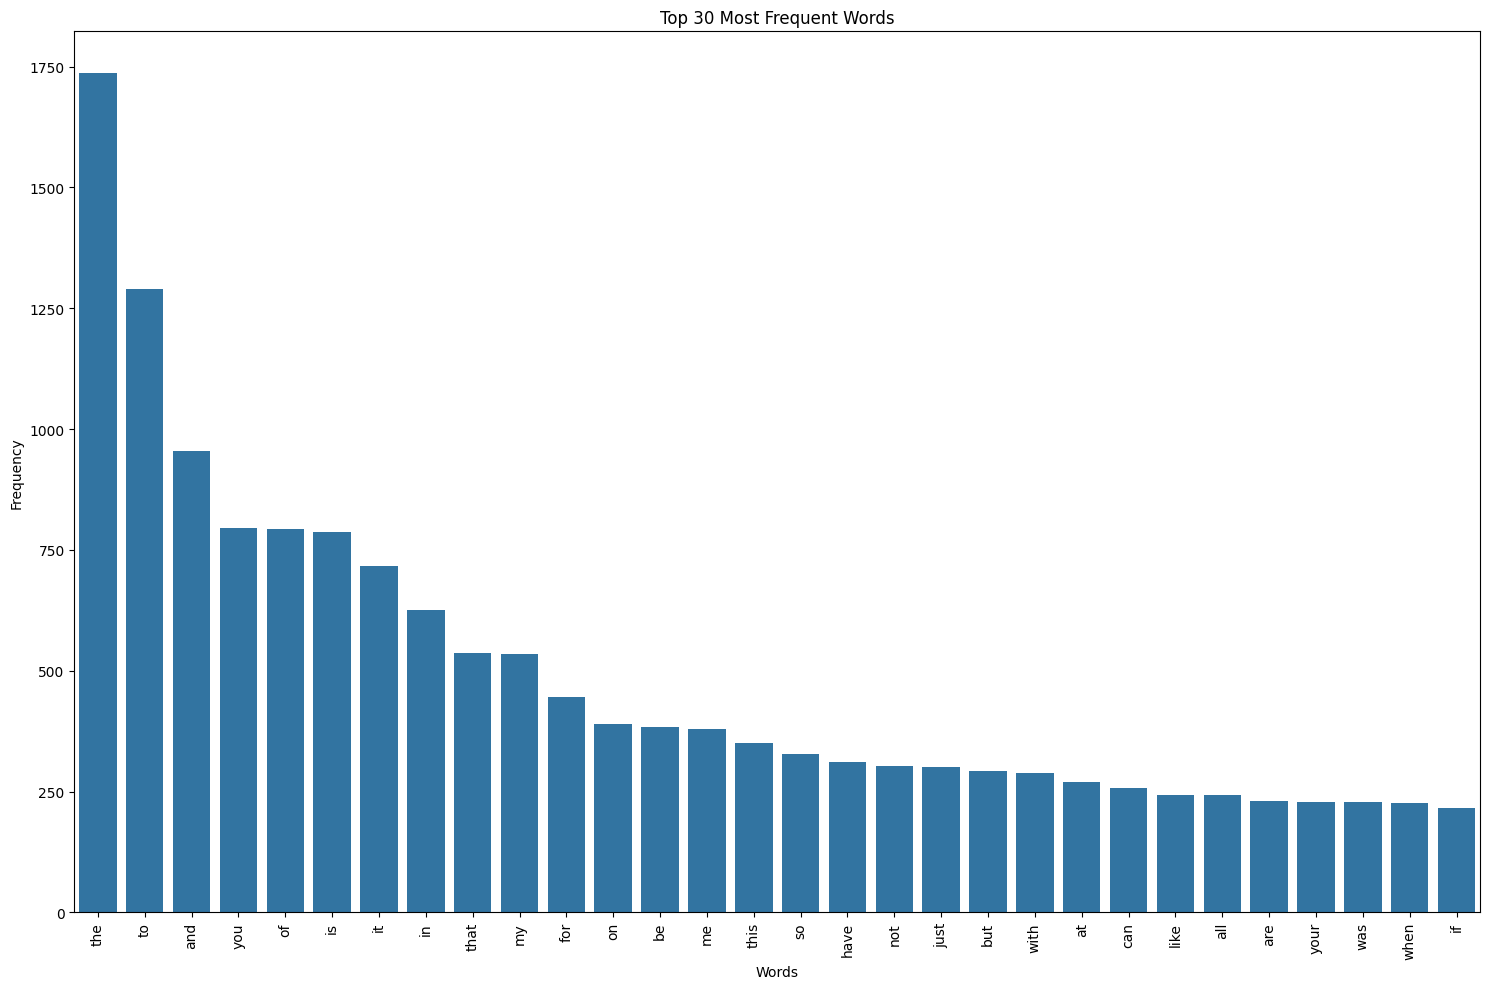

In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_df_counts = count_vect.fit_transform(train_df.text)
#print(train_df_counts[0])

term_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]
print(f"term_frequencies = {term_frequencies}")

indices = np.argsort(term_frequencies)[::-1]  # 排序
print(f"indices = {indices}")
filtered_terms = count_vect.get_feature_names_out()[indices]
print(f"filtered_terms = {filtered_terms}")
filtered_frequencies = term_frequencies[indices]
print(f"filtered_frequencies = {filtered_frequencies}")

plt.subplots(figsize=(15, 10))
g = sns.barplot(x=filtered_terms[:30], y=filtered_frequencies[:30])
g.set_xticklabels(filtered_terms[:30], rotation=90)
plt.title('Top 30 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

print(train_data_TFIDF_features_1000.shape)

feature_names_1000 = TFIDF_1000.get_feature_names_out()
print(feature_names_1000[100:110])

(3613, 1000)
['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
# The correct predictions for anger, fear, joy, and sadness are 57 ,76, 56, and 47 respectively
# The predictions for fear are the most accurate
# Anger, fear and sadness  are easily confused, relatively joy has less confusion

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Classification Report(Naive bayes)):
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



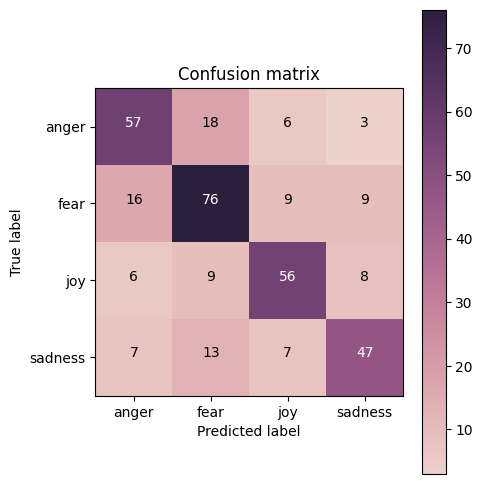

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
NB_model = NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

print("Classification Report(Naive bayes)):")
print(classification_report(y_true=y_test, y_pred=y_test_pred))

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
# Naive Bayes performs better than Decision Tree in the fear category, possibly because Naive Bayes assumes all features are independent, an assumption that might be particularly advantageous for the fear category.
# Compared to the confusion between Anger and Fear in Decision Tree, Naive Bayes shows more evenly distributed confusion without favoring a specific category. This is because Naive Bayes assumes all features are independent, leading to more dispersed prediction results. In contrast, Decision Tree, once a branch is decided, tends to predict toward a specific category, making it less likely to spread predictions across other categories

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?


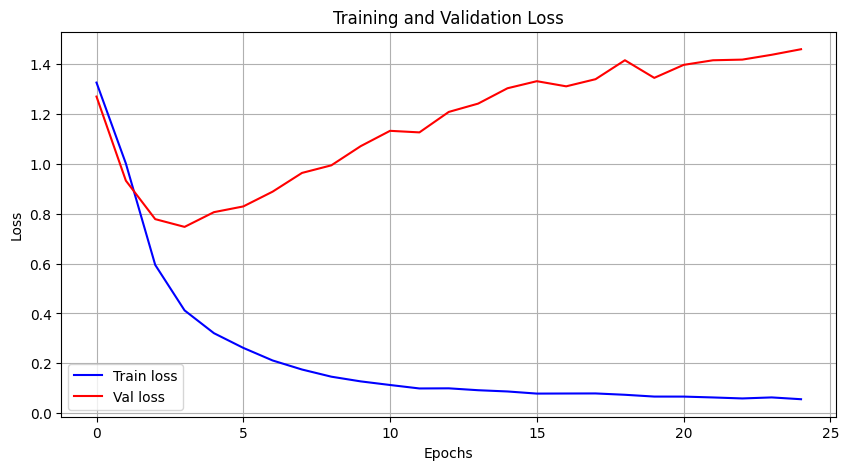

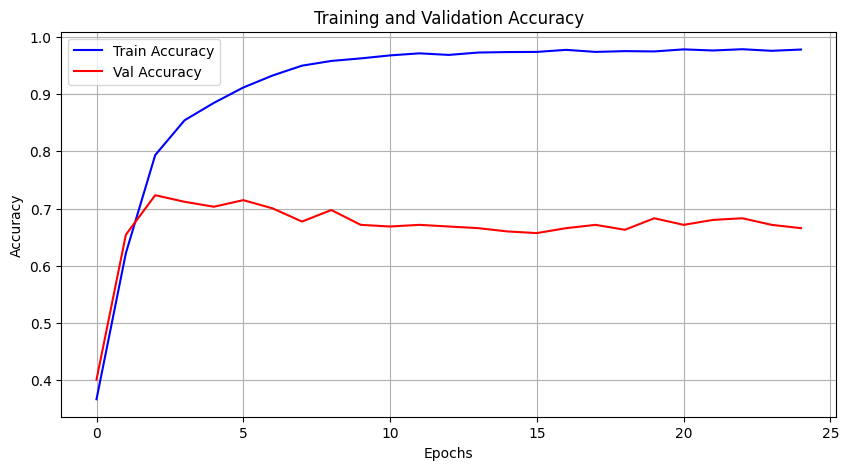

In [ ]:
# Answer here
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'b-', label='Train loss')
plt.plot(history.history['val_loss'], 'r-', label='Val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
# we can take the average of all word vectors, which is a simple method that retains the meaning of each word. However, this approach may fail to capture the meaning of the most important words in the text.
# or we can consider taking the maximum value for each dimension, which captures the most important features of the text. However, this approach may lose much of the contextual meaning.
# or use the TF-IDF method to compute a weighted average of word vectors. This assigns greater importance to words that are more distinctive in the text, potentially enhancing the representation. However, it still might not fully capture contextual relationships.

---


### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

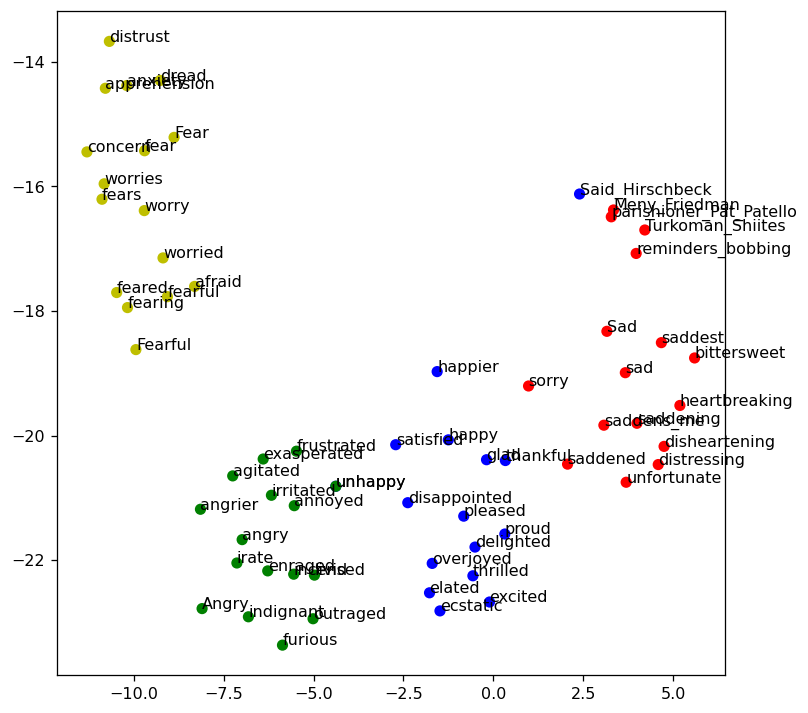

In [ ]:
# Answer here
# t-SNE
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)


## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


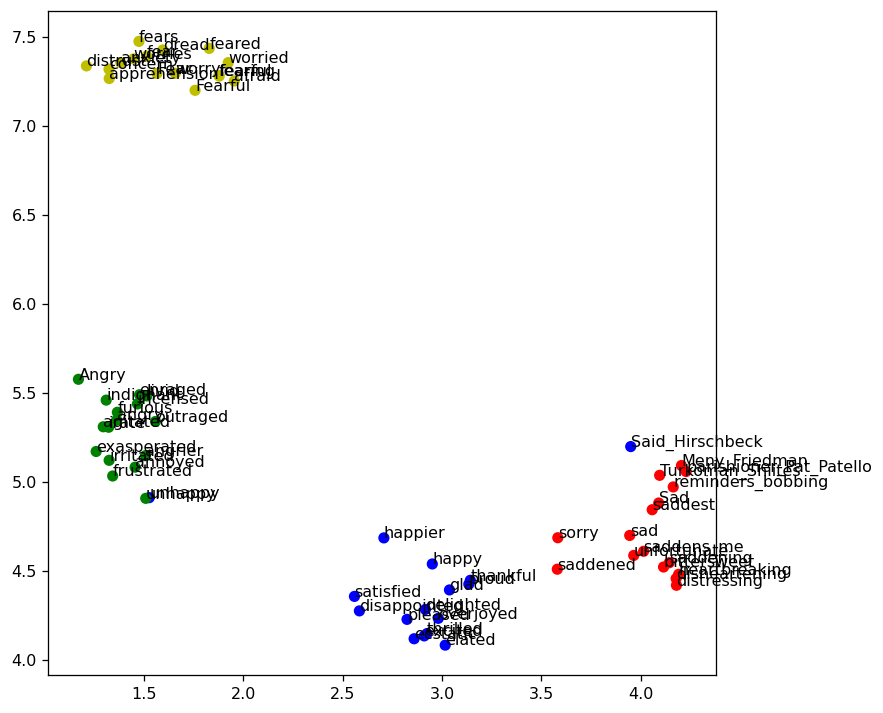

In [ ]:
# Answer here
# UMAP 
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

X_umap = umap_model.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

In [ ]:
# Answer here
# In the t-SNE plot, there is a clear spatial separation between the clusters and the boundaries between the clusters are relatively blurred
# umap focuses more on the overall separation of clusters rather than the distinction within the same cluster.

---


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [ ]:
# Answer here
# There is other role call assistant
# The appropriate use of the 'assistant' role is  set up  predefined response or behavior pattern.
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'assistant',
        'content': 'I am a helpful AI assistant specialized in tourism.'
    },
    {
        'role': 'user',
        'content': 'How do I travel in UK?'
    }
])
print(response['message']['content'])

Traveling in the UK is relatively easy, with a well-developed public transportation system and many affordable options. Here are some common ways to travel in the UK:

1. **By Train**: The National Rail network connects most major cities and towns. You can book tickets online or at train stations. Popular train operators include Virgin Trains, Great Western Railway, and London North Eastern Railway.
2. **By Bus**: National Express operates an extensive network of bus routes across the country. You can book tickets online or at bus stations.
3. **By Coach**: National Express also offers coach services to many destinations.
4. **By Car**: If you prefer to drive, make sure you have a valid UK driving license and car insurance. Parking options vary depending on the location.
5. **By Bike**: The UK has many bike-friendly routes, including the National Cycle Network. You can rent bikes in many cities or bring your own.
6. **By Taxi or Private Hire**: Taxis and private hire services are widel

---


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

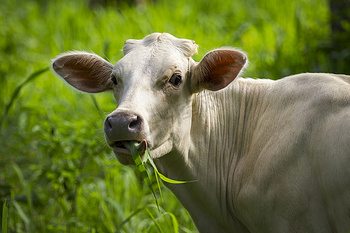

In the heart of a verdant field, a white cow grazes peacefully. The cow's coat gleams under the sunlight, and it has two distinctive brown ears that stand out against its white body. It appears to be engaged in a simple act of survival, as it chews on a blade of grass held firmly in its mouth.

The field around the cow is lush with green plants, creating a serene backdrop for this pastoral scene. The cows' position in relation to these plants suggests they are scattered throughout the field, each enjoying their own space under the open sky.

Despite being the main subject of the image, there's an air of tranquility that permeates through it - a snapshot of life on the farm, captured in one single frame. The cow's actions are unhurried, suggesting a sense of calm and contentment with its surroundings.

Overall, this image paints a picture of rural life, where nature is abundant and animals live freely. It's a simple scene but one that holds a certain charm - the charm of life as it unfolds in its most natural form.

In [ ]:
# Answer here
import IPython.display 
from PIL import Image

img = Image.open('/home/S113062642/DM_HW2/DMLab2/DM2024-Lab2-Master/pics/牛吃草.jpeg')
IPython.display.display(img)

response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['/home/S113062642/DM_HW2/DMLab2/DM2024-Lab2-Master/pics/牛吃草.jpeg'] #Image with the cat
    },
])

display(Markdown(response4['message']['content']))

In [ ]:
# The description is mostly accurate(a white cow grazes peacefully) 
# but has little difference with the actual image(there is only one cow but in the second paragraph mentions that "The cows' position in relation to these plants suggests they are scattered throughout the field, each enjoying their own space under the open sky." )
# I think the main reason the description isn't that accurate could be that during training, the model was exposed to similar farm scene images, which typically include multiple cows. Another possibility is the issue of model hallucination. 

---


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:
# Answer here
llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(urls):
    docs = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict() 
        )
        docs.extend(loader.load()) 
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

urls = [
    "https://en.wikipedia.org/wiki/Shohei_Ohtani",
    "https://en.wikipedia.org/wiki/Michael_Jordan",
    "https://en.wikipedia.org/wiki/Roger_Federer"
]

# Create the retriever
retriever = load_and_retrieve_docs(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

questions = [
    # Ohtani
    "When did Shohei Ohtani played for a team called the Fighters?",
    # Jordan
    "How many seasons he played in the NBA?",
    # Federer
    "Where were Roger Federer born?"
]

# Use the RAG chain
for question in questions:
    result = rag_chain(question)  
    print(f"\nQuestion: {question}")
    display(Markdown(result))


Question: When did Shohei Ohtani played for a team called the Fighters?


Shohei Ohtani played for the Hokkaido Nippon-Ham Fighters from an unknown date until he decided to pursue a career in Major League Baseball. The exact start date of his tenure with the Fighters is not mentioned in the provided text, but it can be inferred that it occurred after 2012, when he was drafted by the team.


Question: How many seasons he played in the NBA?


The text does not specifically mention how many seasons he played in the NBA. It provides information about his scoring in the regular season, playoff scoring, and all-time ranking, but does not provide details on his career length.


Question: Where were Roger Federer born?


The text doesn't explicitly state Roger Federer's birthplace, but it can be inferred that he was born in Switzerland since the article mentions that "Federer and Stan Wawrinka led the Switzerland Davis Cup team to their first title" and also states that he won a silver medal at the 2012 London Olympics. However, the text doesn't confirm if he was born in the UK or elsewhere within Europe before becoming part of the Swiss team.

In [ ]:
# Answer here
# (about Ohtani) actual answer : "He played for the Fighters from 2013 through 2017 as a pitcher and an outfielder." The model has retrieved 'Ohtani was drafted by the team', but the subsequent part was not retrieved.
# (about Jordan) actual answer : "He played 15 seasons in the National Basketball Association (NBA) between 1984 and 2003."The model did not retrieve this text.
# (about Feferer) actual answer : "Federer was born on 8 August 1981 in Basel, Switzerland."The model did not retrieve this text.
# Pros : RAG will answer based on the actual content of the documents, reducing hallucinations. When information is not found, it clearly states that, and therefore, it is less likely to fabricate answers.
# Cons : The answers rely on the quality of document segmentation and are limited to the retrieved document fragments. If the text is split into too small blocks, it may result in missing important context (such as the part about Ohtani). There is also a Coreference Resolution issue (such as in the case of Jordan, where the model cannot recognize that "He" refers to Jordan).

---

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

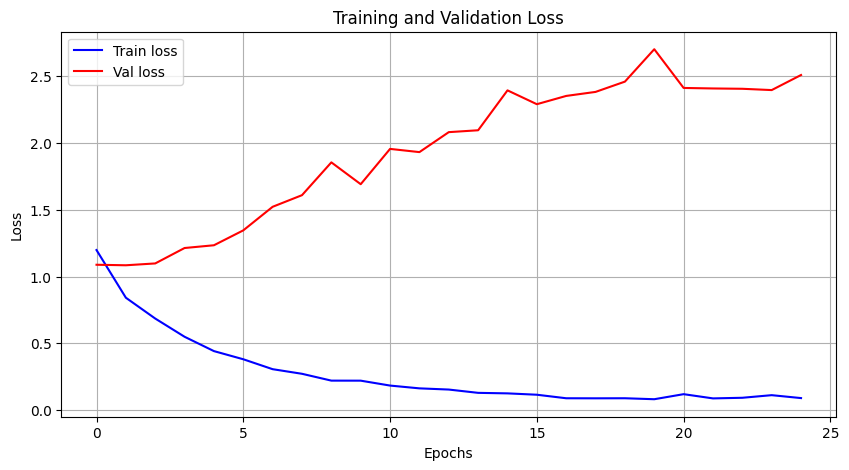

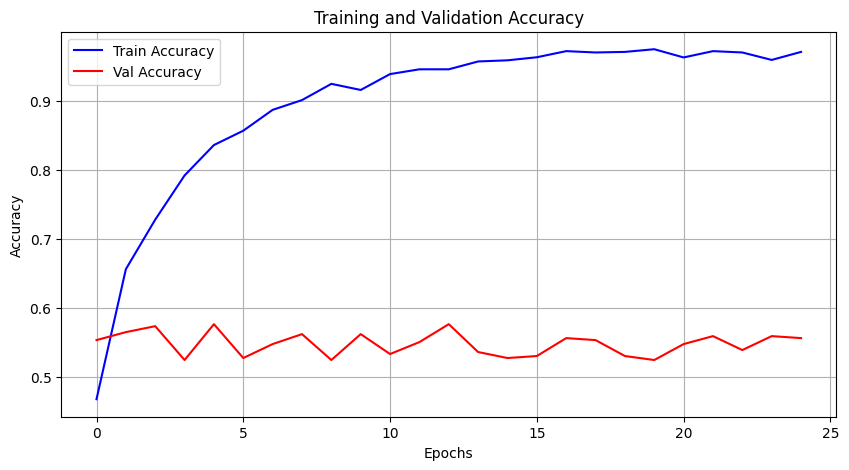

In [ ]:
# Answer here
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'b-', label='Train loss')
plt.plot(history.history['val_loss'], 'r-', label='Val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Answer here
# The performance of the NN model on most labels has shown significant improvement (Fear: 60 → 66, Joy: 33 → 46, Sadness: 26 → 42). I believe the possible reason is that the NN model can better capture the semantic relationships in the text and has a better understanding of the subtle differences in emotional expression."
# LLM embeddings are good at handling high-dimensional data, whereas other models may be affected by the 'curse of dimensionality' in high-dimensional spaces, which can impact the prediction results.

---

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
# I tried using different random states (42, 43, 44, 1), and due to the different samples selected each time, it is difficult to clearly determine which approach—zero-shot, one-shot, or five-shot—works best. The quality of the samples has a significant impact on the model's performance. If the samples clearly represent different labels, the model might be able to better understand the differences between the labels, and one-shot or five-shot learning may perform better. On the other hand, if the samples are poorly selected, it could cause confusion in the model's judgment of the labels, in which case, zero-shot might perform better. Additionally, if the sampled data contains biased or offensive language, it could lead to alignment issues and cause the model to fail in making proper predictions.

---

# Part3

## Preprocessing ＆ Feature engineering Steps
 * When creating the DataFrame, I found that some tweet_id entries do not have corresponding emotion labels. Since the number is small, I chose to remove these missing value data.
 * There are many mention symbols @ in the tweets, but these symbols and the mentioned users are unrelated to the emotion classification task. Therefore, I also removed this noise.
 * Using the emoji library, I converted emojis into text descriptions, allowing the computer to understand their meanings.
 * Social media often contains many hashtag symbols, which I believe do not contribute to the emotion classification task. Therefore, I decided to remove these symbols. However, the text following the hashtags often includes emotional words and special terms that could be helpful for the task, so I chose to retain this portion of the text.
 * Similarly, the data contains many URLs and HTML formats (such as <LH>, https), which I consider to be noise. Therefore, I removed these elements as well.
 * I also attempted to enhance the dataset by adding features such as the number of emojis, the proportion of uppercase letters, and the tweet length. This was aimed at improving the accuracy of classification predictions.
    * The reason for selecting these features is that text with more emojis or uppercase letters often conveys a stronger, more intense tone or emotion. For tweet length, I hypothesized that tweets expressing anger might be shorter due to the brevity of expression driven by frustration, while trust-related tweets might require more words to explain reasoning, and anticipation-related tweets might include detailed descriptions, resulting in longer tweets.
 * Additionally, I observed the distribution of emotion labels and found that the number of joy labels is significantly higher than that of other labels (a total of 516,017, accounting for approximately 35.45%).
   * joy : 516017(35.45%)
   * anticipation : 248935(17.1%)
   * trust : 205478(14.12%)
   * sadness : 193437(13.29%)
   * disgust : 139101(9.56%)
   * fear : 63999(4.40%)
   * surprise : 48729(3.35%)
   * anger : 39867(2.74%) 
 * This indicates that the dataset is highly imbalanced. To address this issue, I chose to randomly select 200,000 samples with the joy label as training data. This helps prevent the model from being biased toward the features of joy, which could otherwise result in poor prediction performance for other emotion categories (e.g., misclassifying minority categories as joy).The adjusted proportions are as follows, It can be seen that the adjusted proportions are relatively balanced, which is more favorable for training.
   * joy : 200000(17.55%)
   * anticipation : 248935(21.85%)
   * trust : 205478(18.03%)
   * sadness : 193437(16.97%)
   * disgust : 139101(12.21%)
   * fear : 63999(5.62%)
   * surprise : 48729(4.28%)
   * anger : 39867(3.50%) 

## Explanation of my model
* Through the lessons and the Lab2 Master assignment, it became clear that using large language models enables a more precise understanding of the context in the text, thereby improving classification tasks. Additionally, since this Kaggle task involves determining the emotion in tweet data, it differs from general classification tasks due to the abundance of abbreviations, misspellings, shorthand, and emojis on Twitter.

* To address these challenges, I chose a fine-tuned BERT-based model called BERTweet, which was trained on a large dataset of approximately 850 million tweets.(Huggingdace : https://huggingface.co/docs/transformers/model_doc/bertweet) BERTweet specifically emphasizes learning these linguistic features, enabling the model to better understand and handle the unique syntax of social media text. It is particularly suited for non-standard language found on Twitter, such as slang, typos, abbreviations, and emotional expressions (e.g., emojis), which traditional BERT models might struggle to capture effectively.

* Since a portion of the data(joy data) was removed, to avoid overfitting, I further split 20% of the training data as validation data. Additionally, I used a Learning Rate Scheduler to dynamically adjust the learning rate, aiming to achieve better training performance.

## Experience I gained
* During the process of training the model, I clearly observed the challenges of data imbalance, gaining a deeper understanding that in real-world applications, data is rarely perfectly balanced—imbalance is actually the norm.

* Additionally, many parameters (e.g., batch size, epochs, learning rate) need to be configured, and determining the best combination for a specific dataset and model often relies entirely on trial and error. Early in the training process, I encountered an issue where setting the batch size too large resulted in insufficient GPU memory, highlighting how heavily model training depends on hardware resources. It also requires a significant amount of time. Moving forward, I hope to explore more diverse approaches when training models.

In [ ]:
import torch
from torch import nn
from transformers import AutoTokenizer, AutoModel, AdamW
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import json
import numpy as np
from sklearn.metrics import classification_report
from tqdm.notebook import tqdm
import re
from sklearn.utils.class_weight import compute_class_weight
from torch.cuda.amp import GradScaler, autocast
import emoji



/home/S113062642/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# build the dataframe and delete column emotion row that is NaN
def create_text_emotion_csv():
    # read tweets_DM.json
    print("Reading tweets...")
    tweets_data = []
    with open('.venv/tweets_DM.json', 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data = json.loads(line)
                tweets_data.append({
                    'tweet_id': data['_source']['tweet']['tweet_id'],
                    'text': data['_source']['tweet']['text']
                })
            except:
                continue
    
    tweets_df = pd.DataFrame(tweets_data)
    print(f"Loaded {len(tweets_df)} tweets")

    # read data
    print("\nReading split information...")
    split_df = pd.read_csv('.venv/data_identification.csv')
    emotion_df = pd.read_csv('.venv/emotion.csv')
    
    # merge data
    print("\nMerging data...")
    result_df = tweets_df.merge(split_df, on='tweet_id', how='left')
    result_df = result_df.merge(emotion_df, on='tweet_id', how='left')
    
    final_df = result_df[['tweet_id', 'text', 'identification', 'emotion']]
    final_df = final_df.rename(columns={'identification': 'split'})
    
    # save as csv
    output_file = 'text_emotion_dataset.csv'
    final_df.to_csv(output_file, index=False)
    print(f"\nSaved to {output_file}")
    
    return final_df

def process_dataframe(df):
   train_df = df[df['split'] == 'train'].copy()
   test_df = df[df['split'] == 'test'].copy()
   
   # delete column emotion row that is NaN
   train_df = train_df.dropna(subset=['emotion'])

   # add emotion feature 
   train_df = add_emotion_features(train_df)
   test_df = add_emotion_features(test_df)

   train_df.to_csv('training_data.csv', index=False)
   test_df.to_csv('testing_data.csv', index=False)
   
   print(f"\nTraining data size: {len(train_df)}")
   print(f"Testing data size: {len(test_df)}")
   
   return train_df, test_df

def add_emotion_features(df):
    df['text_length'] = df['text'].apply(len)
    df['emoji_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in emoji.EMOJI_DATA]))
    df['caps_ratio'] = df['text'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0)

df = create_text_emotion_csv()
train_df, test_df = process_dataframe(df)

Reading tweets...
Loaded 1867535 tweets

Reading split information...
Reading emotion labels...

Merging data...

Saved to text_emotion_dataset.csv

Training data size: 1455563
Testing data size: 411972


In [ ]:
# Sample data in Joy
joy_data = train_df[train_df['emotion']=='joy'].sample(n=200000, random_state=42)
other_data = train_df[train_df['emotion']!='joy']
train_df = pd.concat([joy_data, other_data])

emotion_counts = train_df['emotion'].value_counts()

print("各情緒類別的數量：")
print(emotion_counts)

print("\n各情緒類別的百分比：")
print((emotion_counts / len(train_df) * 100).round(2), "%")

print("\n總資料筆數:", len(train_df))

各情緒類別的數量：
emotion
anticipation    248935
trust           205478
joy             200000
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: count, dtype: int64

各情緒類別的百分比：
emotion
anticipation    21.85
trust           18.03
joy             17.55
sadness         16.97
disgust         12.21
fear             5.62
surprise         4.28
anger            3.50
Name: count, dtype: float64 %

總資料筆數: 1139546


In [ ]:
# Preprocessing
def clean_text(text):
   text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # remove @mentions
   text = re.sub(r'#(\w+)', r'\1', text)       # 保留hashtag內容
   text = re.sub(r'<[^>]+>', 'balanced_train_df', text)         # remove HTML
   text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
   ext = ' '.join(text.split())                       # 移除多餘空格
   return text.strip()

train_df['text'] = train_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)

In [ ]:
# Training model
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

class TweetDataset(Dataset):
   def __init__(self, df, tokenizer, max_len=128):
       self.texts = df['text'].values
       le = LabelEncoder()
       self.labels = le.fit_transform(df['emotion'].values)
       self.tokenizer = tokenizer
       self.max_len = max_len
       self.features = df[['emoji_count']].values

   def __len__(self):
       return len(self.texts)
       
   def __getitem__(self, idx):
       text = str(self.texts[idx])
       label = self.labels[idx]
       
       encoding = self.tokenizer(
           text,
           truncation=True,
           padding='max_length',
           max_length=self.max_len,
           return_tensors='pt'
       )
       
       return {
           'input_ids': encoding['input_ids'].flatten(),
           'attention_mask': encoding['attention_mask'].flatten(),
           'labels': torch.tensor(label, dtype=torch.long)
       }

def train_model(train_df):
   device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
   print(f"Using device: {device}")
   
   tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base")
   model = AutoModelForSequenceClassification.from_pretrained(
       "vinai/bertweet-base", 
       num_labels=8
   ).to(device)
   
   train, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['emotion'])
   print(f"Training samples: {len(train)}, Validation samples: {len(val_df)}")
   
   train_dataset = TweetDataset(train, tokenizer)
   val_dataset = TweetDataset(val_df, tokenizer)
   
   train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
   val_loader = DataLoader(val_dataset, batch_size=512)
   
   optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
   
   num_epochs = 4
   warmup_steps = len(train_loader) * 0.1
   scheduler = get_linear_schedule_with_warmup(
       optimizer,
       num_warmup_steps=warmup_steps,
       num_training_steps=len(train_loader) * num_epochs
   )
   
   best_val_loss = float('inf')
   
   for epoch in range(num_epochs):
       model.train()
       train_loss = 0
       print(f"\nEpoch {epoch+1}/{num_epochs}")
       
       for i, batch in enumerate(train_loader):
           if i % 100 == 0:
               print(f"Training batch: {i}/{len(train_loader)}", end='\r')
               
           optimizer.zero_grad()
           
           input_ids = batch['input_ids'].to(device)
           attention_mask = batch['attention_mask'].to(device)
           labels = batch['labels'].to(device)
           
           outputs = model(
               input_ids=input_ids,
               attention_mask=attention_mask,
               labels=labels
           )
           
           loss = outputs.loss
           loss.backward()
           optimizer.step()
           scheduler.step()
           
           train_loss += loss.item()
           
       model.eval()
       val_loss = 0
       preds = []
       true_labels = []
       
       print("\nValidation:")
       for i, batch in enumerate(val_loader):
           if i % 100 == 0:
               print(f"Validation batch: {i}/{len(val_loader)}", end='\r')
               
           input_ids = batch['input_ids'].to(device)
           attention_mask = batch['attention_mask'].to(device)
           labels = batch['labels'].to(device)
           
           with torch.no_grad():
               outputs = model(
                   input_ids=input_ids,
                   attention_mask=attention_mask,
                   labels=labels
               )
           
           val_loss += outputs.loss.item()
           preds.extend(outputs.logits.argmax(dim=-1).cpu().numpy())
           true_labels.extend(labels.cpu().numpy())
       
       avg_train_loss = train_loss / len(train_loader)
       avg_val_loss = val_loss / len(val_loader)
       accuracy = (np.array(preds) == np.array(true_labels)).mean()
       macro_f1 = f1_score(true_labels, preds, average='macro')
       weighted_f1 = f1_score(true_labels, preds, average='weighted')
       
       print(f'\nEpoch {epoch+1} Results:')
       print(f'Average train loss: {avg_train_loss:.4f}')
       print(f'Average val loss: {avg_val_loss:.4f}')
       print(f'Validation accuracy: {accuracy:.4f}')
       print(f'Macro F1: {macro_f1:.4f}')
       print(f'Weighted F1: {weighted_f1:.4f}\n')
       
       if avg_val_loss < best_val_loss:
           best_val_loss = avg_val_loss
           torch.save(model.state_dict(), 'best_model.pt')
           print("Saved best model\n")


if __name__ == "__main__":
   train_model(train_df)

Using device: cuda


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training samples: 911636, Validation samples: 227910

Epoch 1/4
Training batch: 1700/1781
Validation:
Validation batch: 400/446
Epoch 1 Results:
Average train loss: 1.1757
Average val loss: 1.0020
Validation accuracy: 0.6336
Macro F1: 0.5871
Weighted F1: 0.6292

Saved best model


Epoch 2/4
Training batch: 1700/1781
Validation:
Validation batch: 400/446
Epoch 2 Results:
Average train loss: 0.9645
Average val loss: 0.9663
Validation accuracy: 0.6479
Macro F1: 0.6010
Weighted F1: 0.6435

Saved best model


Epoch 3/4
Training batch: 1700/1781
Validation:
Validation batch: 400/446
Epoch 3 Results:
Average train loss: 0.9024
Average val loss: 0.9589
Validation accuracy: 0.6523
Macro F1: 0.6087
Weighted F1: 0.6501

Saved best model


Epoch 4/4
Training batch: 1700/1781
Validation:
Validation batch: 400/446
Epoch 4 Results:
Average train loss: 0.8643
Average val loss: 0.9592
Validation accuracy: 0.6539
Macro F1: 0.6106
Weighted F1: 0.6515



In [ ]:
# Predict
def predict_emotions(test_df, model_path='best_model.pt'):
   device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
   
   tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base")
   model = AutoModelForSequenceClassification.from_pretrained(
       "vinai/bertweet-base", 
       num_labels=8
   ).to(device)
   
   model.load_state_dict(torch.load(model_path))
   model.eval()
   
   # 儲存LabelEncoder
   le = LabelEncoder()
   le.fit(train_df['emotion'])  
   
   test_dataset = TweetDataset(test_df, tokenizer)
   test_loader = DataLoader(test_dataset, batch_size=512)
   
   predictions = []
   print("\nPredicting:")
   
   for i, batch in enumerate(test_loader):
       if i % 100 == 0:
           print(f"Test batch: {i}/{len(test_loader)}", end='\r')
           
       input_ids = batch['input_ids'].to(device)
       attention_mask = batch['attention_mask'].to(device)
       
       with torch.no_grad():
           outputs = model(input_ids=input_ids, attention_mask=attention_mask)
           preds = outputs.logits.argmax(dim=-1).cpu().numpy()
           predictions.extend(preds)
   
   # 將數字標籤轉回原始情緒標籤
   predictions = le.inverse_transform(predictions)
   test_df['emotion'] = predictions
   return test_df

test_predictions = predict_emotions(test_df, model_path='best_model.pt')
test_predictions
#test_predictions = test_predictions[['id', 'emotion']]
#test_predictions.to_csv('~/predictions.csv', index=False)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_5507/3253621910.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicit


Predicting:


,tweet_id,text,split,emotion
2,0x28b412,"Confident of your obedience, I write to you, k...",test,anticipation
4,0x2de201,"""Trust is not the same as faith. A friend is s...",test,trust
9,0x218443,When do you have enough ? When are you satisfi...,test,joy
30,0x2939d5,"God woke you up, now chase the day GodsPlan Go...",test,anticipation
33,0x26289a,"In these tough times, who do YOU turn to as yo...",test,trust
...,...,...,...,...
1867525,0x2913b4,"""For this is the message that ye heard from th...",test,anticipation
1867529,0x2a980e,"""There is a lad here, which hath five barley l...",test,anticipation
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,test,sadness
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,test,trust


In [ ]:
test_predictions_new = test_predictions[['tweet_id', 'emotion']]
test_predictions_new.to_csv('~/predictions.csv', index=False)
test_predictions_new = test_predictions_new.rename(columns={'tweet_id': 'id'})